In [45]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [46]:
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    S: Current stock price
    K: Strike price
    T: Time to maturity (in years)
    r: Risk-free interest rate (annualized)
    sigma: Volatility of the underlying asset (annualized)
    option_type: 'call' or 'put'
    """
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price, d1, d2

In [47]:
def calculate_greeks(S, K, T, r, sigma, d1, d2, option_type='call'):
    """
    Calculate Delta, Gamma, Vega, Theta, and Rho for the option.
    - Delta and Gamma are returned as percentages.
    - Theta is returned as the daily change in option price.
    """
    if option_type == 'call':
        delta = norm.cdf(d1) * 100  # Delta as a percentage
        theta = (- (S * norm.pdf(d1) * sigma) / (2 * math.sqrt(T)) - r * K * math.exp(-r * T) * norm.cdf(d2)) / 365  # Theta per day
        rho = K * T * math.exp(-r * T) * norm.cdf(d2)  # Rho per year
    elif option_type == 'put':
        delta = -norm.cdf(-d1) * 100  # Delta as a percentage
        theta = (- (S * norm.pdf(d1) * sigma) / (2 * math.sqrt(T)) + r * K * math.exp(-r * T) * norm.cdf(-d2)) / 365  # Theta per day
        rho = -K * T * math.exp(-r * T) * norm.cdf(-d2)  # Rho per year
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    gamma = (norm.pdf(d1) / (S * sigma * math.sqrt(T))) * 100  # Gamma as a percentage
    vega = S * norm.pdf(d1) * math.sqrt(T)  # Vega per 1% change in volatility
    
    return delta, gamma, vega, theta, rho

In [48]:
def plot_greeks_vs_stock_price(S, K, T, r, sigma, option_type):
    """
    Plot Delta, Gamma, Vega, Theta, and Rho as functions of the underlying stock price.
    """
    S_range = np.linspace(S * 0.5, S * 1.5, 100)  # Stock price range (50% to 150% of S)
    deltas, gammas, vegas, thetas, rhos = [], [], [], [], []
    
    for s in S_range:
        _, d1, d2 = black_scholes(s, K, T, r, sigma, option_type)
        delta, gamma, vega, theta, rho = calculate_greeks(s, K, T, r, sigma, d1, d2, option_type)
        deltas.append(delta)
        gammas.append(gamma)
        vegas.append(vega)
        thetas.append(theta)
        rhos.append(rho)
    
    # Plot Delta
    plt.figure(figsize=(10, 6))
    plt.plot(S_range, deltas, label="Delta", color="blue")
    plt.axvline(S, color="red", linestyle="--", label=f"Current Stock Price (S = {S:.2f})")
    plt.title(f"Delta vs. Stock Price ({option_type.capitalize()})")
    plt.xlabel("Stock Price (S)")
    plt.ylabel("Delta (%)")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot Gamma
    plt.figure(figsize=(10, 6))
    plt.plot(S_range, gammas, label="Gamma", color="green")
    plt.axvline(S, color="red", linestyle="--", label=f"Current Stock Price (S = {S:.2f})")
    plt.title(f"Gamma vs. Stock Price ({option_type.capitalize()})")
    plt.xlabel("Stock Price (S)")
    plt.ylabel("Gamma (%)")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot Vega
    plt.figure(figsize=(10, 6))
    plt.plot(S_range, vegas, label="Vega", color="purple")
    plt.axvline(S, color="red", linestyle="--", label=f"Current Stock Price (S = {S:.2f})")
    plt.title(f"Vega vs. Stock Price ({option_type.capitalize()})")
    plt.xlabel("Stock Price (S)")
    plt.ylabel("Vega")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot Theta
    plt.figure(figsize=(10, 6))
    plt.plot(S_range, thetas, label="Theta", color="orange")
    plt.axvline(S, color="red", linestyle="--", label=f"Current Stock Price (S = {S:.2f})")
    plt.title(f"Theta vs. Stock Price ({option_type.capitalize()})")
    plt.xlabel("Stock Price (S)")
    plt.ylabel("Theta (per day)")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot Rho
    plt.figure(figsize=(10, 6))
    plt.plot(S_range, rhos, label="Rho", color="brown")
    plt.axvline(S, color="red", linestyle="--", label=f"Current Stock Price (S = {S:.2f})")
    plt.title(f"Rho vs. Stock Price ({option_type.capitalize()})")
    plt.xlabel("Stock Price (S)")
    plt.ylabel("Rho")
    plt.legend()
    plt.grid()
    plt.show()
    

def plot_option_value_and_delta(S, K, T, r, sigma, option_type='call'):
    """
    Plot the option value and Delta tangent line.
    - S: Current stock price
    - K: Strike price
    - T: Time to maturity (in years)
    - r: Risk-free interest rate (annualized)
    - sigma: Volatility (annualized)
    - option_type: 'call' or 'put'
    """
    # Define a range of stock prices
    S_range = np.linspace(S * 0.5, S * 1.5, 100)
    
    # Calculate option values for the stock price range
    option_values = [black_scholes(s, K, T, r, sigma, option_type)[0] for s in S_range]
    
    # Calculate Delta at the current stock price
    _, d1, _ = black_scholes(S, K, T, r, sigma, option_type)
    delta = norm.cdf(d1) if option_type == 'call' else -norm.cdf(-d1)
    
    # Find the index of the closest value to S in S_range
    closest_index = np.argmin(np.abs(S_range - S))
    # Calculate the tangent line (Delta line) at the current stock price
    tangent_line = option_values[closest_index] + delta * (S_range - S)
    
    # Calculate the payoff line (intrinsic value at expiration)
    if option_type == 'call':
        payoff_line = np.maximum(S_range - K, 0)
    else:
        payoff_line = np.maximum(K - S_range, 0)
    
    # Plot the option value, payoff line, and Delta tangent line
    plt.figure(figsize=(10, 6))
    plt.plot(S_range, option_values, label="Option Value", color="blue")
    plt.plot(S_range, payoff_line, label="Payoff at Expiration", color="green", linestyle="--")
    plt.plot(S_range, tangent_line, label=f"Delta Tangent Line (Δ = {delta:.2f})", color="red", linestyle=":")
    plt.axvline(S, color="black", linestyle="--", label=f"Current Stock Price (S = {S:.2f})")
    plt.axvline(K, color="purple", linestyle="--", label=f"Strike Price (K = {K:.2f})")
    
    # Add dashed horizontal lines for specific option values
    option_value_at_S = black_scholes(S, K, T, r, sigma, option_type)[0]
    plt.axhline(option_value_at_S, color="gray", linestyle="--", label=f"Option Value at S = {option_value_at_S:.2f}")
    
    
    # Add labels and title
    plt.title(f"Option Value and Delta Tangent Line ({option_type.capitalize()})")
    plt.xlabel("Stock Price (S)")
    plt.ylabel("Option Value")
    plt.legend()
    plt.grid()
    plt.show()



In [49]:
def get_user_inputs():
    S = float(input("Enter the current stock price (S): "))
    K = float(input("Enter the strike price (K): "))
    T = float(input("Enter the time to maturity in years (T): "))
    r = float(input("Enter the risk-free interest rate (r) as a decimal (e.g., 0.05 for 5%): "))
    sigma = float(input("Enter the volatility (sigma) as a decimal (e.g., 0.2 for 20%): "))
    option_type = input("Enter the option type ('call' or 'put'): ").strip().lower()
    
    return S, K, T, r, sigma, option_type

Black-Scholes Option Pricing with Greeks and Charts
-------------------------------------------------
Enter the current stock price (S): 100
Enter the strike price (K): 80
Enter the time to maturity in years (T): 0.08
Enter the risk-free interest rate (r) as a decimal (e.g., 0.05 for 5%): 0.045
Enter the volatility (sigma) as a decimal (e.g., 0.2 for 20%): 0.5
Enter the option type ('call' or 'put'): put

Theoretical Put Option Price: 0.29

Greeks:
Delta: -4.7062%
Gamma: 0.6948%
Vega: 2.7792
Theta: -0.0232 (per day)
Rho: -0.3997


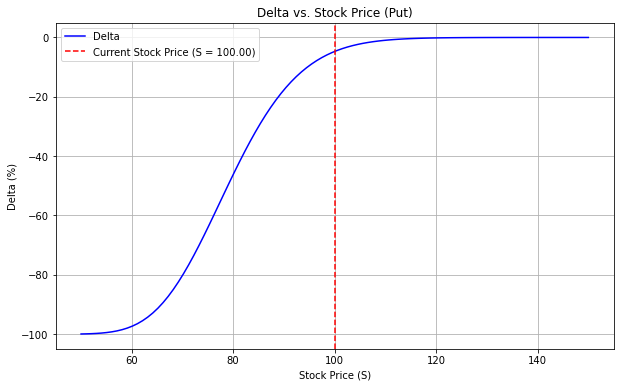

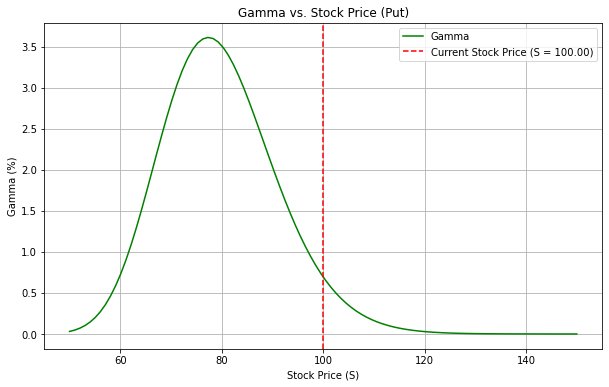

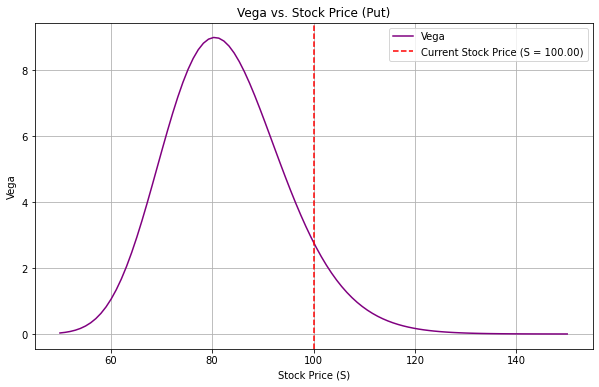

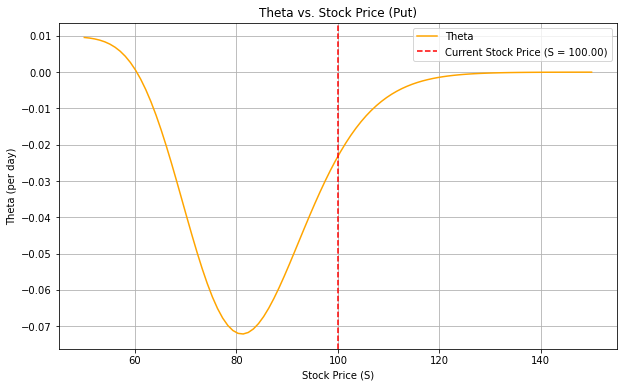

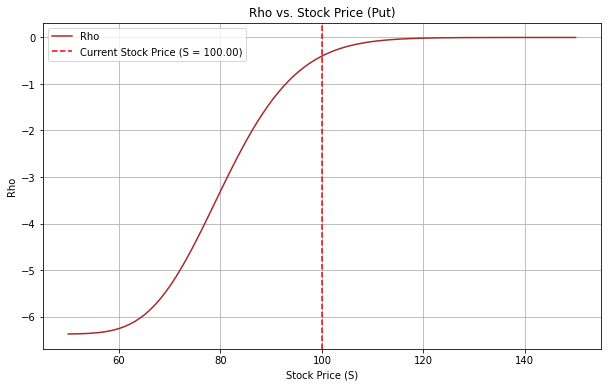

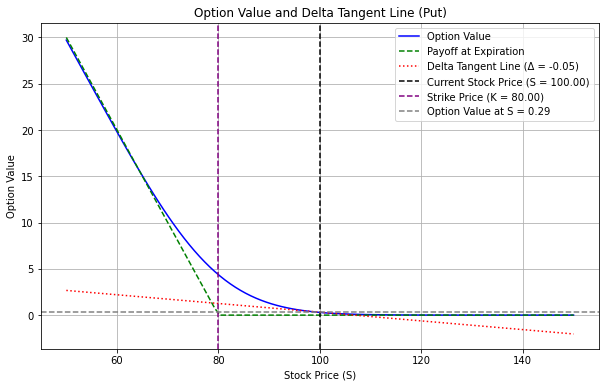


Sensitivity Measures:
Sensitivity Measure  |      Value
Delta (Δ)            |   -4.7062%
Gamma (Γ)            |    0.6948%
Vega (ν)             |     2.7792
Theta (Θ)            | -0.0232 (per day)
Rho (ρ)              |    -0.3997


In [51]:
if __name__ == "__main__":
    print("Black-Scholes Option Pricing with Greeks and Charts")
    print("-------------------------------------------------")
    
    # Get user inputs
    S, K, T, r, sigma, option_type = get_user_inputs()
    
    # Validate option type
    if option_type not in ['call', 'put']:
        print("Invalid option type. Please enter 'call' or 'put'.")
    else:
        # Calculate option price, d1, and d2
        option_price, d1, d2 = black_scholes(S, K, T, r, sigma, option_type)
        
        # Output theoretical option price
        print(f"\nTheoretical {option_type.capitalize()} Option Price: {option_price:.2f}")
        
        # Calculate and display the Greeks
        delta, gamma, vega, theta, rho = calculate_greeks(S, K, T, r, sigma, d1, d2, option_type)
        print("\nGreeks:")
        print(f"Delta: {delta:.4f}%")
        print(f"Gamma: {gamma:.4f}%")
        print(f"Vega: {vega:.4f}")
        print(f"Theta: {theta:.4f} (per day)")
        print(f"Rho: {rho:.4f}")
        
        # Plot Greeks vs. stock price
        plot_greeks_vs_stock_price(S, K, T, r, sigma, option_type)
        
        
        # Plot option value and Delta tangent line
        plot_option_value_and_delta(S, K, T, r, sigma, option_type)
        
        # Display sensitivity table
        display_sensitivity_table(S, K, T, r, sigma, option_type)